In [20]:
using Images
using Colors
using FileIO
using Interpolations
using Plots

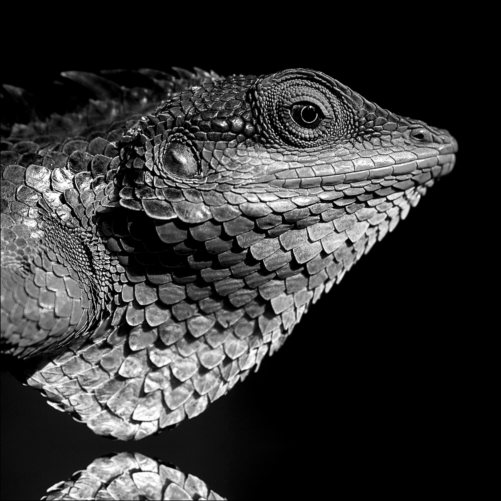

In [24]:
# specify the path to your local image file and load it:
img_path = "./images/input/lizard.jpg"
img = load(img_path)
img_grey = Gray{Float32}.(img)

# Hough transform most simple example
detecting one line:

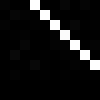

In [93]:
include("imageops.jl")
img = load("./images/input/geom3.jpg")
sobel_img = Gray{Float32}.(img)

(x, y, x_rel, y_rel) = (4, 1, -1, -4)
r = -2.1213202f0
(x, y, x_rel, y_rel) = (5, 2, 0, -3)
r = -2.1213202f0
(x, y, x_rel, y_rel) = (6, 3, 1, -2)
r = -2.1213202f0
(x, y, x_rel, y_rel) = (7, 4, 2, -1)
r = -2.1213202f0
(x, y, x_rel, y_rel) = (8, 5, 3, 0)
r = -2.1213202f0
(x, y, x_rel, y_rel) = (9, 6, 4, 1)
r = -2.1213202f0
(x, y, x_rel, y_rel) = (10, 7, 5, 2)
r = -2.1213202f0


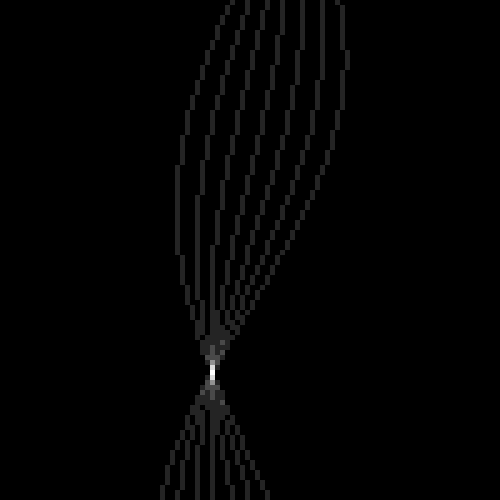

In [94]:
acc_matrix = hugh_transform_accumulator_matrix(sobel_img, (100,100))
imresize(Gray.(acc_matrix), (500, 500), method=Interpolations.Constant())

In [95]:
top_k = get_top_k_from_acc_matrix(acc_matrix, 2)

2-element Vector{Tuple{Int64, Int64, Float32}}:
 (76, 43, 0.85714287)
 (75, 43, 1.0)

In [97]:
(h,w) = size(sobel_img)
top_k_mn = map(top_k) do (phi_index, r_index, val)
    phi = map_index_to_phi(phi_index,size(acc_matrix)[1])
    r = map_index_to_r(r_index,size(acc_matrix)[2], (w,h)) + eps(Float32)
    (m,n) = phi_and_r_to_m_and_n(phi,r)
    @show phi, r, m, n
    return (m,n)
end

(phi, r, m, n) = (2.3876104167282426, -1.9798988681130432, 1.0648918403247913, -2.8922755657947294)
(phi, r, m, n) = (2.356194490192345, -1.9798988681130432, 0.9999999999999999, -2.799999831412605)


2-element Vector{Tuple{Float64, Float64}}:
 (1.0648918403247913, -2.8922755657947294)
 (0.9999999999999999, -2.799999831412605)

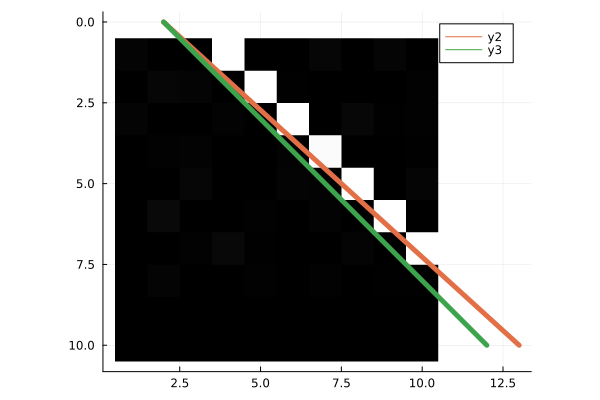

In [102]:
p = plot(sobel_img)
(h,w) = size(sobel_img)
for (m,n) in top_k_mn


    x1 = -w ÷ 2
    x2 = w ÷ 2

    y1 = floor(Int, m*x1-n)
    y2 = floor(Int,m*x2-n)

    (x1,y1) = rel_pos_to_abs((x1,y1),(w,h))
    (x2,y2) = rel_pos_to_abs((x2,y2),(w,h))

    

    plot!([y1,y2],[x1,x2], linewidth=5)
end
p